## Imports

In [4]:
import math
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection as ms

# Synthetic Regression Data

In [5]:
def hidden_law(x):
    return math.sin( 2*math.pi*x )

In [6]:
hidden_law = np.vectorize( lambda x: math.sin( 2*math.pi*x ))

In [7]:
x_all = np.arange(0, 1, 0.01)

In [8]:
y_hidden = hidden_law( x_all )

In [9]:
x_all

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [10]:
y_hidden

array([ 0.00000000e+00,  6.27905195e-02,  1.25333234e-01,  1.87381315e-01,
        2.48689887e-01,  3.09016994e-01,  3.68124553e-01,  4.25779292e-01,
        4.81753674e-01,  5.35826795e-01,  5.87785252e-01,  6.37423990e-01,
        6.84547106e-01,  7.28968627e-01,  7.70513243e-01,  8.09016994e-01,
        8.44327926e-01,  8.76306680e-01,  9.04827052e-01,  9.29776486e-01,
        9.51056516e-01,  9.68583161e-01,  9.82287251e-01,  9.92114701e-01,
        9.98026728e-01,  1.00000000e+00,  9.98026728e-01,  9.92114701e-01,
        9.82287251e-01,  9.68583161e-01,  9.51056516e-01,  9.29776486e-01,
        9.04827052e-01,  8.76306680e-01,  8.44327926e-01,  8.09016994e-01,
        7.70513243e-01,  7.28968627e-01,  6.84547106e-01,  6.37423990e-01,
        5.87785252e-01,  5.35826795e-01,  4.81753674e-01,  4.25779292e-01,
        3.68124553e-01,  3.09016994e-01,  2.48689887e-01,  1.87381315e-01,
        1.25333234e-01,  6.27905195e-02,  1.22464680e-16, -6.27905195e-02,
       -1.25333234e-01, -

In [15]:
np.random.seed(42)
noise = 0.2
samples = 20

# dataset
x = np.random.rand( samples )
y = np.sin(2*np.pi*x) + noise*np.random.randn(samples)

# split training and test dataset
x_train, x_val, y_train, y_val = ms.train_test_split(x, y, test_size=0.3)

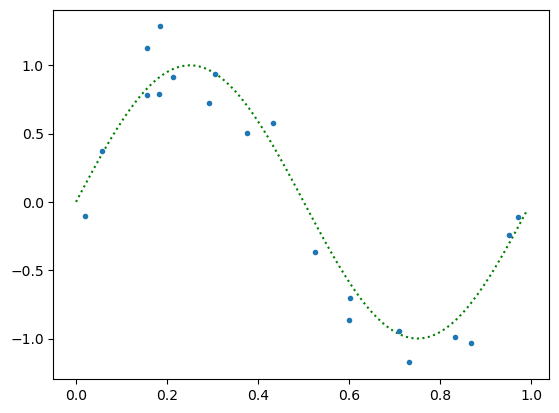

In [16]:
plt.plot(x_all, y_hidden, ':g')
plt.plot(x, y, '.')

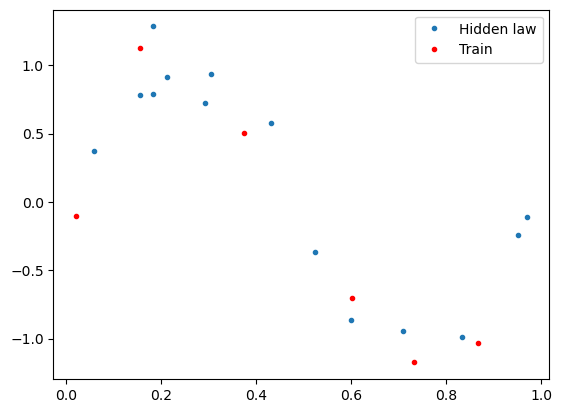

In [17]:
# plt.plot(x_all, y_hidden, ':g')
plt.plot(x_train, y_train, '.')
plt.plot(x_val, y_val, 'r.')
plt.legend(['Hidden law', 'Train', 'Validation']);

# Treinamento


In [28]:
max_poly_degree = 14
poly_degrees = range(max_poly_degree)

polys = []
for p in poly_degrees:
    poly_model = np.polyfit(x_train, y_train, p)
    polys.append( poly_model )

In [29]:
rmse_train = np.zeros(max_poly_degree)
rmse_val = np.zeros(max_poly_degree)

for p in poly_degrees:
    # predict over training dataset
    yhat_train = np.polyval(polys[p], x_train)

In [30]:
for p in poly_degrees:
    # predict over training dataset
    yhat_train = np.polyval( polys[p], x_train)
    rmse_train[p] = np.sqrt( np.mean( np.square( yhat_train - y_train ) ) )
    # predict over validation dataset
    yhat_val = np.polyval( polys[p], x_val )
    rmse_val[p] = np.sqrt( np.mean( np.square( yhat_val - y_val ) ) )

<Figure size 1500x900 with 0 Axes>

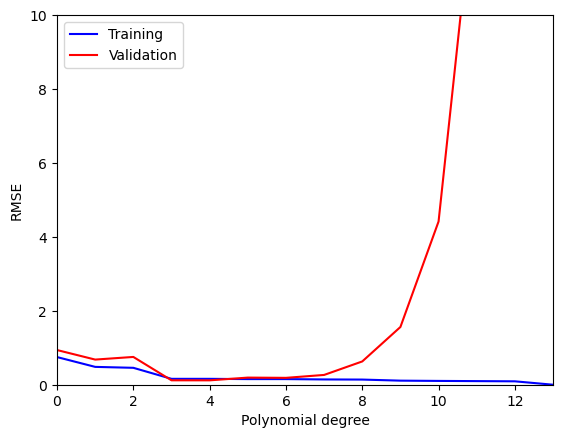

<Figure size 1500x900 with 0 Axes>

In [31]:
plt.plot( poly_degrees, rmse_train, 'b' )
plt.plot( poly_degrees, rmse_val, 'r' )
plt.axis( ( 0, max_poly_degree-1, 0, 10 ) )
plt.legend(['Training', 'Validation'])
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE');

plt.figure(figsize=(15, 9))

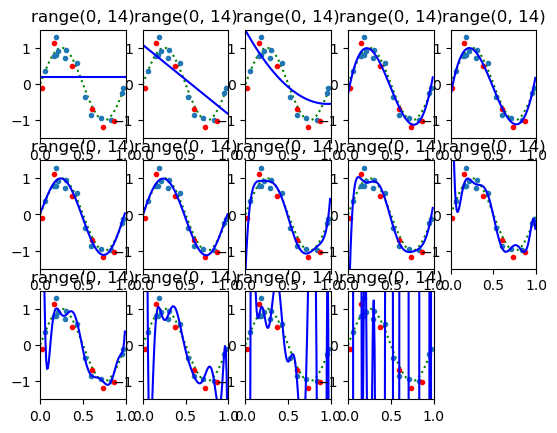

In [32]:
for p in poly_degrees:
    plt.subplot(3, 5, p+1)
    y_pol = np.polyval(polys[p], x_all)
    plt.plot(x_all, y_hidden, ':g')
    plt.plot(x_train, y_train, '.')
    plt.plot(x_val, y_val, 'r.')
    plt.plot(x_all, y_pol, 'b')
    plt.title(poly_degrees)
    plt.axis((0, 1, -1.5, 1.5))
